In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

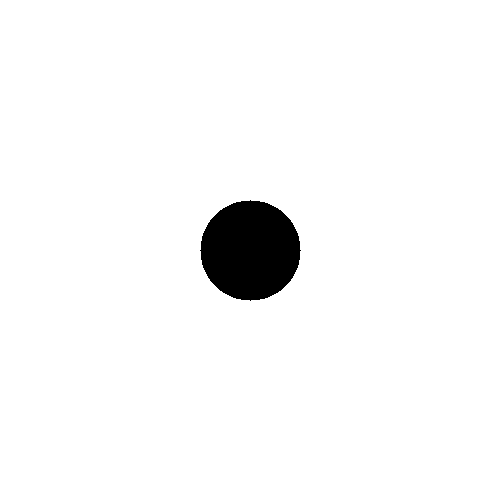

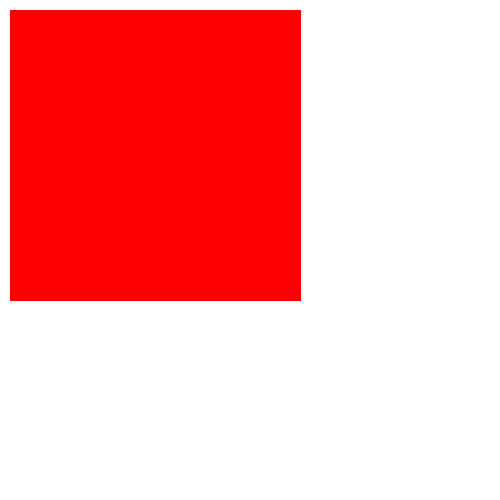

In [ ]:
#task 1a  
img1=np.zeros((500,500,3),dtype="uint8")
img1[:]=(255,255,255)
cv2.circle(img1, (250,250), 50, (0,0,0), (-1))#BGR
cv2_imshow(img1)

img2=np.zeros((500,500,3),dtype="uint8")
img2[:]=(255,255,255)
cv2.rectangle(img2,(10,10),(300,300),(0,0,255),(-1))#BGR
cv2_imshow(img2)




Add


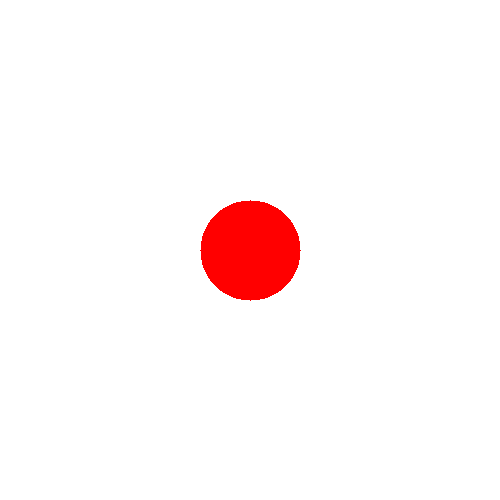

Sub


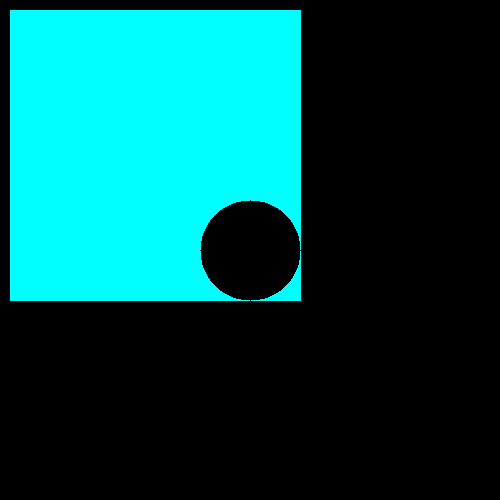

Multiply


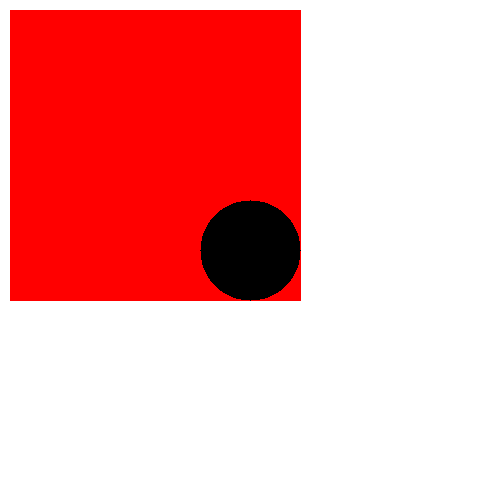

Division


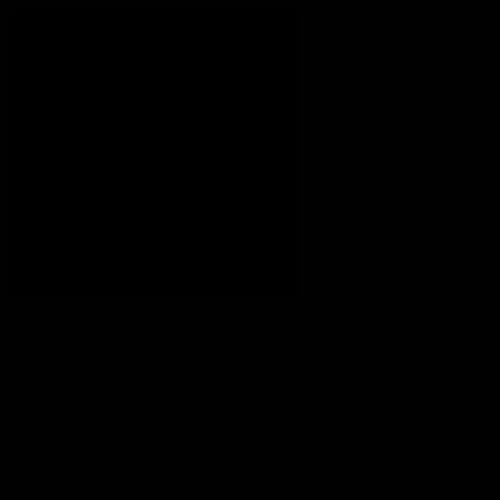

and


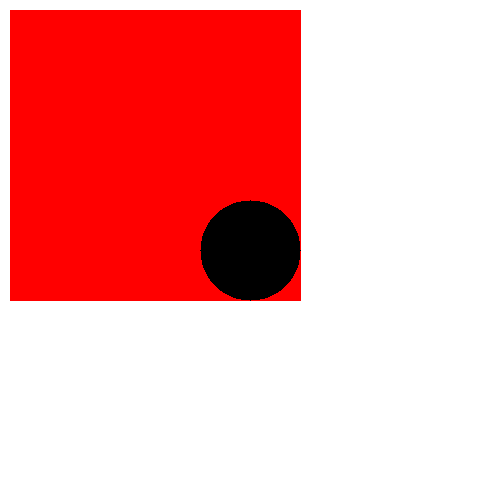

or


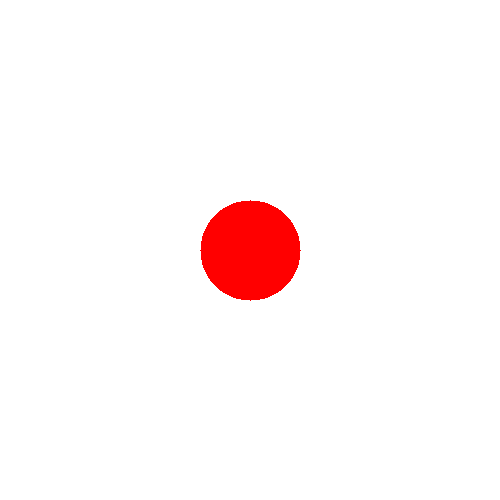

not


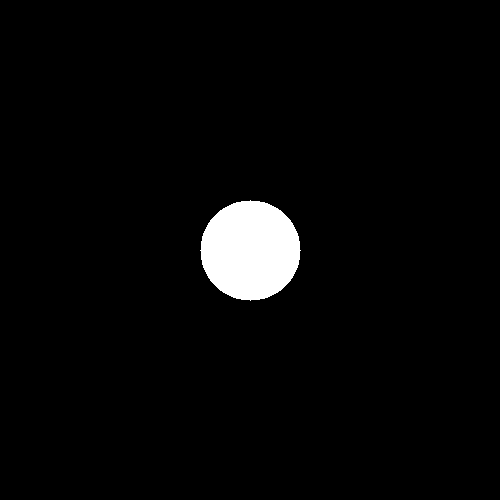

In [ ]:
#add
print("Add")
added=cv2.add(img1,img2)
cv2_imshow(added)
#sub

print("Sub")
subt=cv2.subtract(img1,img2)
cv2_imshow(subt)
#multiplication

print("Multiply")
mult=cv2.multiply(img1,img2)
cv2_imshow(mult)

#division

print("Division")
div=cv2.divide(img1,img2)
cv2_imshow(div)

#And or not
print("and")
log1=cv2.bitwise_and(img1,img2)
cv2_imshow(log1)

print("or")
log2=cv2.bitwise_or(img1,img2)
cv2_imshow(log2)

print("not")
log3=cv2.bitwise_not(img1,img2)
cv2_imshow(log3)

In [ ]:
#task 1b
img=cv2.imread('pizza.png',0)
#cv2_imshow(img)

h=img.shape[0]
w=img.shape[1]
size=img.shape
print(img.shape)
#cv2_imshow(img)


sum=0
cnt=0
for x in range(0,h):
  for y in range(0,w):
        sum=sum+img[x,y]
        img[x,y]+=10
        cnt+=1
print(sum)
print(cnt)
print("Average Intensity: ",sum/cnt)

sum=0
cnt=0
for x in range(0,h):
  for y in range(0,w):
        sum=sum+img[x,y]
        cnt+=1
print(sum)
print(cnt)
print("Average Intensity: ",sum/cnt)



(483, 605)
30455417
292215
Average Intensity:  104.22263401947197
32802591
292215
Average Intensity:  112.25498691032288


(372, 366, 3)
Input:


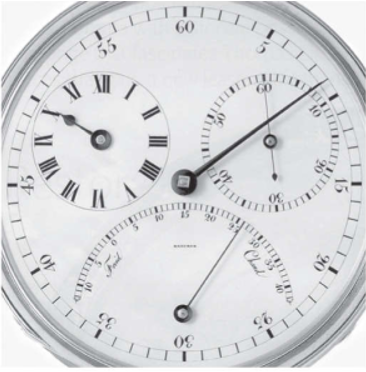

Output:


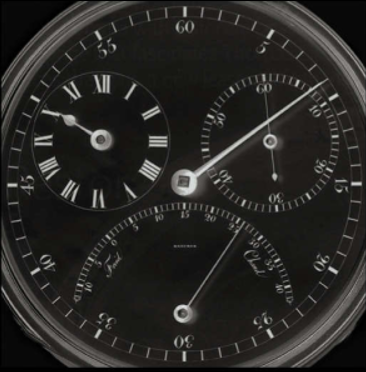

In [ ]:
#task 1c
img=cv2.imread('clock.png')

h=img.shape[0]
w=img.shape[1]
c=img.shape[2]
size=img.shape
print(img.shape)
print("Input:")
cv2_imshow(img)

img1=np.zeros(size,np.uint8)

for x in range(0,h):
  for y in range(0,w):
    for z in range(0,c):
      img1[x,y,z]=255-img[x,y,z]

print("Output:")
cv2_imshow(img1)

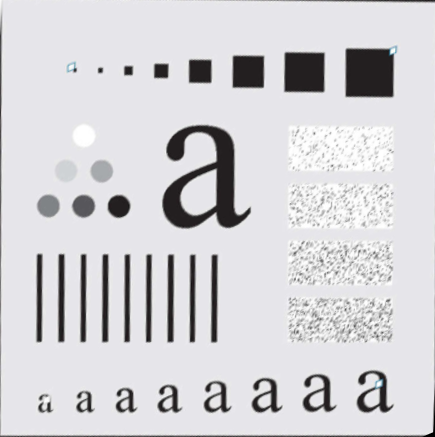

In [ ]:
#task 1d
im1=cv2.imread('ref_aaa.png')
im2=cv2.imread('aaa.png')

img1=cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
img2=cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)


orb=cv2.ORB_create(250)
kp1,des1=orb.detectAndCompute(img1,None)
kp2,des2=orb.detectAndCompute(img2,None)

matcher=cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

matches=matcher.match(des1,des2,None)

matches=sorted(matches,key=lambda x:x.distance)

points1=np.zeros((len(matches),2),dtype=np.float32)
points2=np.zeros((len(matches),2),dtype=np.float32)

for i,match in enumerate(matches):
  points1[i,:]=kp1[match.queryIdx].pt
  points2[i,:]=kp2[match.trainIdx].pt

h,mask=cv2.findHomography(points1,points2,cv2.RANSAC)

height,width,ch=im2.shape
im1Reg=cv2.warpPerspective(im1,h,(width,height))

cv2_imshow(im1Reg)